# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
 
 
* [NN for vision](#NN-for-vision)
  * [ Fully Connected Neural Net](#Fully-Connected-Neural-Net)
  * [Stationarity](#Stationarity)
  * [ Locally Conncected Neural Net](#Locally-Conncected-Neural-Net)
  * [ Convoluition Neural Net](#Convoluition-Neural-Net)        
    * [ Convolution  ](#Convolution)
      * [numpy convolution](#numpy-convolution)
          * [ 1D convolution](#1D-convolution)
      * [scipy convolution](#scipy-convolution)
          * [ 2D convolution](#2D-convolution)
      * [ Image Processing ](#Image-Processing)
          * [Image Filtering](#Image-Filtering)
              * [convolution 연산 직접 구현](#convolution-연산-직접-구현)
              * [padding](#padding)
              * [kernel](#kernel)
* [병렬 처리](#병렬-처리)
     * [joblib](#joblib)
       * [Parallel](#Parallel)
* [흑백 이미지의 값 보여주기](#흑백-이미지의-값-보여주기)
* [matplotlib](#matplotlib)
     * [State Machine](#State-Machine)



---
## Neural Nets for Vison
CVPR 2012 Tutorial on Deep Larning part3
    - major 학회에서 제공한 tutorial
    
- gradient vanishing, 문제를 해결해서 신경망 재부활
- 2012 Imagenet의 AlexNet이 압도적 우승
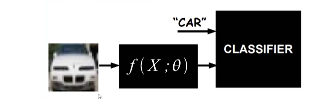

feature extractor 를 f(X; theta) 함수로 표현 가능
- 함수로 만들어 놓으면 문제를 parameterized function 가장 잘 되는 머신러닝 이용해서  파라미터를 찾음 
- features 효과적으로 계산되고 훈련됨
- end-to-end recognition system 으로 만들어서 feature extractor, classifier구분이 없어짐
- **합성함수(functon composition)로 더 복잡한 비선형 시스템** 만들어서 복잡한 분류 가능하게 됨
    - 각 레이어 함수의 **파라미터는 학습할 대상(trainable parameters)**
    - Sequential하게 feed forward함 
       - layer 함수는 activation과 합쳐져서 복잡한 비선형 시스템으로 만듦 

- 시스템은 계층적 특성 hierarchy of features 생성
    - 이전 레이어 기반으로 특성이 생김 
    - transfer learning, convolution이 이것을 이용함 
        - <> LesNet 건너 뜀..
    - 처음에는 간단한 직선에서 각 kernel이 조합되어 새로운 특성이 나왔으나 점점 유사한 특징이 나옴 
        - feature crossed(교차 특성):특성간의 곱으로 생김

DL model :
- generative model
    - 클래스 분포를 찾아서 어떻 새로운 데이터 들어왔을때 확률에 따라서 분류
    - 분포를 따르는 새로운 데이터를 만듦
    - ML의 Naive Bayes
- discriminant model
    - 결정 직선/평면 찾는 모델 
   
    
Key Idea
1. Learn features from data
    - 이전에는 사람이 특성 지정
2. Use differentiable functions(미분 가능한 함수) that produce features efficiently
    - gradient descent 방식으로 최적화하기 떄문에 미분 가능해야함
     - 단계별로 쪼개서 chainrule이용해서 효율적 학습 가능
3. End-to-end learning
    - no districiton between feature extractor and classifer
4. Deep architecture
    - cascade of simpler non-linar modules
---     
##  Neural Network
 - a stack of logistic regression classifiers
     - 예전에는 sigmoid를 활성함수를 사용해었기 때문
 - 학습 :Feed Forward & Back Propagation

###  Architecture   
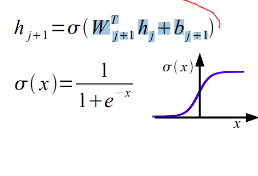
 - 이론적 **합성함수**
 - 실제 벡터연산 (효율적 연산)
     - 데이터가 선형결합해서 비선형 활성 함수에 들어감
- functional, array programming!!!


Graphical Notation
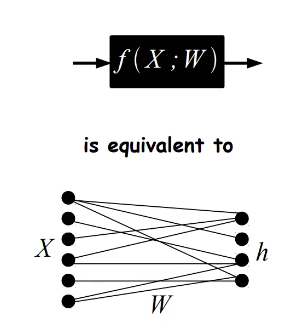
- 모델을 그래프로 표현 (h:feature, hidden unit,neuron)
- 확률기반, 선형 대수 기반으로 간단하게 표현

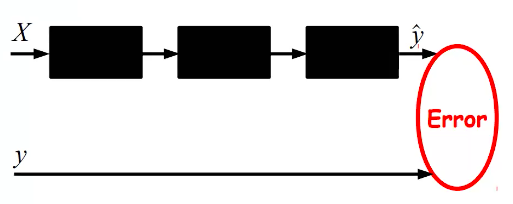

 - 예측값과 실제값값의 차이(Error)를 최소화 
 - loss function
     - classificaton : cross entropy 분포차이
     - regression:  mse
- node, layer수, layer 종류(Dense,Conv2D,,),loss
- loss, optimization(loss 최소화 하는 알고리즘), 



---
###  NN for vision
### Fully Connected Neural Net
- 각 노드가 전체가 서로 연결됨 -> 복잡함
- 학습 파라미터가 많아서 과적합 가능
- 문제:  2차원 그림을  fully connected는 1차원 입력 받게되면 연관된 공간정보를 잃게됨 
    - pixel간의 의존성이 사라짐 
    - 1차원화 되면 각 이미지에 있는 객체의 위치마다 다르게 있어 특성 파악이 어려움 
    - mnist연습용 데이터들은 다 가운데에 위치
    - 공간 정보 이용불가, weight공유 안 함

#### Stationarity
- 공간에 따라서 변하지 않는 특성
    - 1차원에서는 의미를 잃음
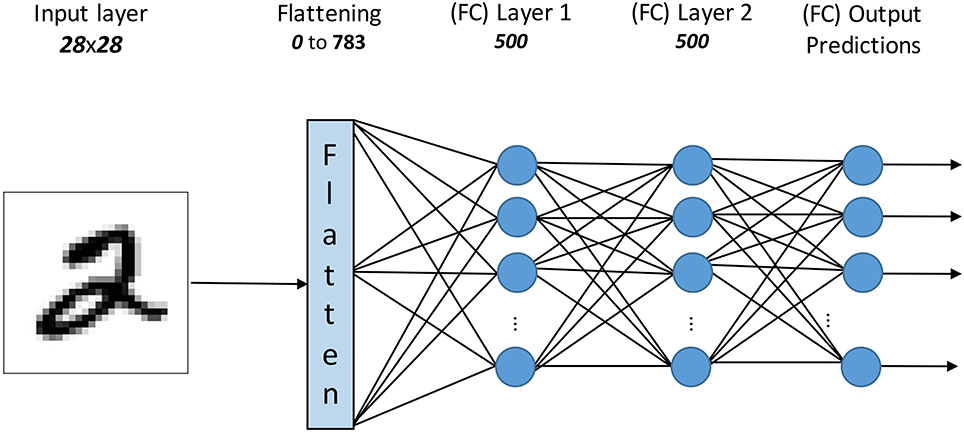
- convolution : 공간정보 유지하기 위해서 local 특징을 가장 잘 표현함
    - local부분만 계산해서 연관성을 보여줌
    - flip 하면 correlation 연산 결과가 동일한 형태
    - local부분 특징 뽑아서 변화된 값을 사용 가능

### Locally Conncected Neural Net
- receptive field 에 따라서 output달라짐
- **학습할 파라미터를 fcnn보다 적음**
- 커널을 다하는 것이 아닌 각 커널마다 웨이트가 공유하지 않아서 다름
    - LocallyConnected2D
    
#### Convoluition Neural Net
- **공간정보 이용**하기 떄문에 공간에 **stationarity** 존재하여 위치에 영향을 받지 않는 특성 추출 
- **shared weight* LCNN
    - 동일한 weight/kernel 로 전체 이미지 슬라이딩하여 이미지의 다른 위치에서 동일한 weight 재사용(공유)
    - 연산량 이 줄어들어 필요한 데이터 줄어듦
    - 여러개의 kernel/filters 를 이미지와 convolution 연산하여 결과값을 각 feature map으로 표현
        - 특징이 거의 일치하면 큰 값으로 나옴 
- **pooling** 공간의 값을 하나의 값으로 대표하는  
     - Conv2D
 - Raw data -> {Convolution->pooling} -> FCNN -> output
참고 : https://pennlio.wordpress.com/2014/04/11/fully-connected-locally-connected-and-shared-weights-layer-in-neural-networks/

CNN by PyTorch https://www.cs.toronto.edu/~lczhang/360/lec/w04/convnet.html

In [ ]:
tf.keras.layers.Conv2D
tf.keras.layers.LocallyConnected2D

## Convolution
- 합성곱
-  CNN 구현에서는 convolution 이 아닌 cross-correlation 이용하여 구현

1. ### Cross-correlation
    - 교차상관
        - correlation(상관성) : 신호처리에서 두 시그널의 동질성의 척도
            - 상관성이 크며 두 시그널을 비슷함
    -  딥러닝 프레임워크들은 합성곱이 아니고 그냥 교차상관으로 구현되어 있음 CNN
         - 학습을 통해서 **이미지에서 특징을 잘 추출(feture extraction)하는 kernel/filter 값을 찾는것**이 목적으로 이미지가 바뀌어도 결과는 동일하며 연산의 효율성 때문
               
 이것은 correlation 연산
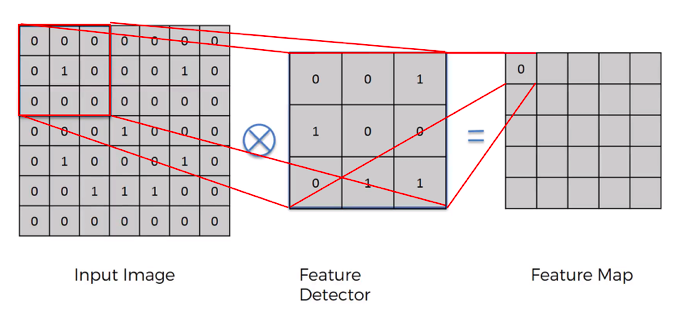
    - 이미지 보다 작은 kernel과 element-wise 곱하여 더함


2. ### Convolution
    - **kernel을 좌우,상하 반전**을 한 후에 Cross-correlation 연산
    - CNN에서 불필요 
         - 자기 고유 특징을 나타내는 이미지로 변함

- 실제 convolution 사용이 CNN, image filtering 사용이 다름

### numpy convolution

In [181]:
np.lookfor( 'conv') #

Search results for 'conv'
-------------------------
numpy.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.poly1d
    A one-dimensional polynomial class.
numpy.asarray
    Convert the input to an array.
numpy.deg2rad
    Convert angles from degrees to radians.
numpy.degrees
    Convert angles from radians to degrees.
numpy.rad2deg
    Convert angles from radians to degrees.
numpy.radians
    Convert angles from degrees to radians.
numpy.asfarray
    Return an array converted to a float type.
numpy.asscalar
    Convert an array of size 1 to its scalar equivalent.
numpy.asanyarray
    Convert the input to an ndarray, but pass ndarray subclasses through.
numpy.atleast_1d
    Convert inputs to arrays with at least one dimension.
numpy.ma.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.format_parser
    Class to convert formats, names, titles description to a dtype.
numpy.char.lower
    Return an arra

In [183]:
np.convolve([1,2,3],[4,5,6]) # 1D convolution (자연어 처리에서 많이 사용함)

array([ 4, 13, 28, 27, 18])

#### 1D convolution
- `np.convolve` : 1차원
- 신호, 자연어 처리에서 사용
    - 첫번째 array(kernel) 좌우 반전

- valid [ 1*4 , 2*4 + 1*5 , 4*3_5*2 _6*1 ,...] = [ 4 , 13, 28...]   

In [189]:
np.convolve([1,2,3],[4,5,6,7,8,9], mode='vaild') #extrapolaton(외삽)없는 부분만

array([28, 34, 40, 46])

In [188]:
np.convolve([1,2,3],[4,5,6,7,8,9], mode='same') #원본과 크기 맞춰줌

array([13, 28, 34, 40, 46, 42])

In [190]:
np.convolve([1,2,3],[4,5,6,7,8,9], mode='full') #padding 포함

array([ 4, 13, 28, 34, 40, 46, 42, 27])

In [ ]:
numpy.ma.comvolve - masked array( 값이 없어도 실행됨 )

#### 2D convolution
### scipy convolution

In [84]:
from scipy import signal # 신호처리로부터 나왔기 때문에

In [85]:
signal.convolve2d, signal.correlate

(<function scipy.signal.signaltools.convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0)>,
 <function scipy.signal.signaltools.correlate(in1, in2, mode='full', method='auto')>)

In [86]:
a=np.random.randint(0,10,9).reshape(3,3)
b=np.random.randint(0,2,25).reshape(5,5)
signal.convolve2d(a,b) #기본 mode=full

array([[ 0,  5,  7,  9,  0,  0,  0],
       [ 0,  6, 12, 20,  7,  9,  0],
       [ 5, 13, 15, 13,  5,  6,  0],
       [ 6, 17, 21, 18, 15, 13,  9],
       [11, 18, 29, 14,  7,  5,  6],
       [ 6,  7, 22,  7, 11,  1,  6],
       [ 5,  6,  7,  6,  0,  0,  0]])

In [87]:
signal.convolve2d(a,b, mode='valid')

array([[15, 13,  5],
       [21, 18, 15],
       [29, 14,  7]])

In [88]:
signal.convolve2d(a,b, mode='same')

array([[15, 13,  5],
       [21, 18, 15],
       [29, 14,  7]])

In [89]:
ke=np.fliplr(np.flipud(a)) #상하좌우반전
ke

array([[6, 1, 5],
       [6, 5, 1],
       [9, 7, 5]])

In [90]:
ke,b[:3,:3]

(array([[6, 1, 5],
        [6, 5, 1],
        [9, 7, 5]]),
 array([[0, 1, 0],
        [0, 1, 0],
        [1, 0, 0]]))

각 곱해서 더하기 때문!!

In [95]:
ke*b[:3,:3]

array([[0, 1, 0],
       [0, 5, 0],
       [9, 0, 0]])

In [97]:
np.einsum('ij,ij->ij',ke,b[:3,:3])

array([[0, 1, 0],
       [0, 5, 0],
       [9, 0, 0]])

In [92]:
np.sum(ke*b[:3,:3]) #1+5+9=15

15

In [98]:
np.einsum('ij,ij->ij',ke,b[:3,1:4])

array([[6, 0, 0],
       [6, 0, 1],
       [0, 0, 0]])

In [94]:
np.sum(ke*b[:3,1:4]) #6+6+1=13

13

In [99]:
np.einsum('ij,ij->ij',ke,b[:3,2:5]) # 5

array([[0, 0, 0],
       [0, 5, 0],
       [0, 0, 0]])

In [93]:
np.sum(ke*b[:3,2:5])

5

## Image Processing
1. image warping
    - 이미지의 domain( 피셀 위치) 옮김
        - (x,y) -> (x',y')
    - 기하학적 변형( scale, rotate, warp)
    -  색상자체는 무변
2. image filtering
    - 이미지의 range(픽셀 값) 변경
    - Blur, edge detection
    - 색상 변화 있음
    
### Image Filtering
- 이미지의 특성을 바꾸거나 개선하거나 이미지로부터 정보를 추출하기위해 사용
- 이미지를 blurring, sharpening, embossing, edge detection 과 filter/kernel을 이용
    - low-pass filter(LPF)
        - denosie , blurring
    - high-pass filter(HPF)
        - edge detection
        
#### Image Filtering에서의 convolution 연산
- 2D Convolution
- 이미지와 커널간에 합성곱을 통하여 적용하여 고유 특징을 나타내는 이미지로 바뀜 
- 원본이 원래 결과에서 안 나오는 경우가 있어서 상하좌우 반전해서 결과값 유지 되도록 하여 연산 결과값이 제일 유사함
- kernel/filter 에 따라서 convolution 연산 결과 달라짐

- [tensorflow blog convolution vs cross correlation](https://tensorflow.blog/2017/12/21/convolution-vs-cross-correlation/)
### 2D convolution
참고: https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html


- ML stride하는 이유 차원축소 
PCA, 다양한 차원 축소 기법 : pooling, stride 
Numpy는 범용적이므로 영상 신호처리를 위한게 아니라서  stride 지원 없음

In [1]:
from PIL import Image

In [2]:
im=Image.open('dog.jpg')

In [3]:
im.size #(가로 ,세로)

(500, 651)

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
img=cv2.imread('dog.jpg')
img   #컬러 이미지 ->흑백 이미지 

array([[[ 39,  46,  63],
        [ 37,  44,  61],
        [ 33,  40,  57],
        ...,
        [ 44,  46,  54],
        [ 44,  46,  54],
        [ 44,  46,  54]],

       [[ 39,  46,  63],
        [ 36,  43,  60],
        [ 33,  40,  57],
        ...,
        [ 44,  46,  54],
        [ 44,  46,  54],
        [ 44,  46,  54]],

       [[ 36,  43,  60],
        [ 31,  38,  55],
        [ 30,  37,  54],
        ...,
        [ 41,  43,  51],
        [ 42,  44,  52],
        [ 43,  45,  53]],

       ...,

       [[ 98,  92, 109],
        [ 90,  84, 101],
        [102,  96, 113],
        ...,
        [108, 107, 123],
        [110, 109, 125],
        [109, 108, 124]],

       [[101,  95, 112],
        [ 94,  88, 105],
        [105,  99, 116],
        ...,
        [102, 101, 117],
        [100,  99, 115],
        [100,  99, 115]],

       [[103,  97, 114],
        [ 96,  90, 107],
        [107, 101, 118],
        ...,
        [ 93,  92, 108],
        [ 90,  89, 105],
        [ 89,  88, 104]]

photoshop custom filter - convolution 연산에 따라서 이미지 변경

### OpenCV convolution
####  black box model
- 사람이 어떻게 분류하는지 이해못함
-  attention으로 접근은 가능하긴 하나 완벽하지 못함

PIL ,Scipy, OpenCV, Scikit-image에 filter가 있음
filter는  convolution 기법으로 구현되어 있음

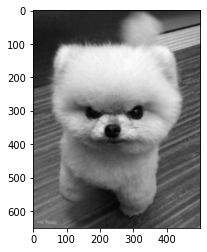

In [86]:
plt.imshow( cv2.GaussianBlur(gray_img,(5,5),0),cmap='gray')

OpenCV 로 불러오면 bgr로 불러옴

In [6]:
 gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #BGR -> Gray

####  convolution 연산 직접 구현 
1. kernel 상하좌우 반전
2. correlation 연산
    - element-wise로 곱하고 합산

### padding
- convolution  windo sliding하면 convolution한 결과가 원래 이미지 결과보다 작아지게 됨
    - CNN에서는 차원축소
    - 영상의 filterring에서는 중앙에 잇는 값은 여러번 연산하고 바깥의 가장자리는 최대 1번만 되는 경향이 있어 가장자리의 특징을 잘 못찾아 냄
    
 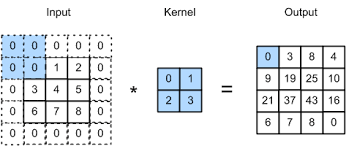
- convolution 연산 결과가 input 크기와 동일하게 나오도록 이미지 바깥에 다른 값들로 채워서 동일하게 처리되도록 함

padding size = (kernel shape -1) + image shape

In [30]:
paded_img=np.zeros((gray_img.shape[0]+kernel.shape[0]-1,
                    gray_img.shape[1]+kernel.shape[1]-1))

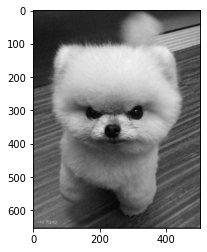

In [31]:
paded_img[1:-1 , 1:-1]=gray_img  #겉에 테두리 생김
plt.imshow(paded_img,cmap='gray')

In [32]:
paded_img  #행렬 가장자리게 0으로 채워줌

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  50.,  48., ...,  48.,  48.,   0.],
       [  0.,  50.,  47., ...,  48.,  48.,   0.],
       ...,
       [  0., 101.,  94., ..., 104., 104.,   0.],
       [  0., 103.,  96., ...,  94.,  93.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [35]:
gray_img.shape

(651, 500)

In [37]:
paded_img.shape

(653, 502)

In [65]:
kernel_org = np.array([[0,0,0],[0,1,0],[0,0,0]]) # no change

In [66]:
conv_kernel = np.flipud(np.fliplr(kernel_org)) #1. 상하좌우 반전
conv_kernel

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [67]:
conv_kernel.shape

(3, 3)

In [68]:
output=np.zeros_like(gray_img)

In [69]:
#for 중첩으로 비효율적
#2. correlation 연산
for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x]=( conv_kernel*paded_img[y:y+kernel_org.shape[1],x:x+kernel_org.shape[0]]).sum() #곱합

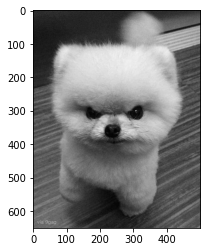

In [70]:
plt.imshow(output, cmap='gray') #crispy함

이미지에 비어 있는 부분은 보간이 안되어서 임

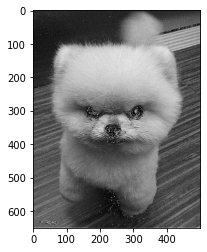

In [84]:
#edge detection kerne - 가장 자리만 보임
kernel =np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

conv_kernel = np.flipud(np.fliplr(kernel)) #상하좌우 반전

for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x]=( conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum() 

plt.imshow(output, cmap='gray') 

flip없이 하기
- 시간, 주파수 영역에서 다른 영역으로 변화할때 차이를 줄이기 위해 반전
- convolution 곱하고 같이 유지 해야하는데 값이 정확히 유지 되지 않아서 변함
- domain 상의 값 보완을 위해서 반전,반전

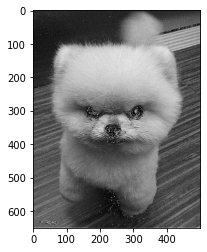

In [85]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #3x3
conv_kernel=kernel          #flip없음

for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x]=(conv_kernel*paded_img[y : y+kernel.shape[1],x : x+kernel.shape[0]]).sum() 
        
plt.imshow(output, cmap='gray') #crispy함

### kernel
- edge 
    - 이미지 속에서는 갑작스런 비연속성(sudden discontinuities )을 나타냄
    - object recognition에서 중요
#### Edge Detection 
- intensity 함수의 큰 변화량

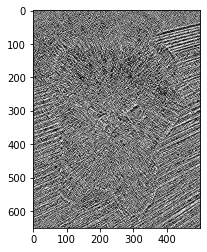

In [133]:
#edge detection kerne - 가장 자리만 보임
kernel =np.array([[1,0,-1],[0,0,0],[-1,0,1]])

conv_kernel = np.flipud(np.fliplr(kernel)) #상하좌우 반전

for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x]=( conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum() 

plt.imshow(output, cmap='gray') 

#### Box Blur
- normalized
- averaging filter 로 불리며 해당 픽셀값의 평귱값을 취함

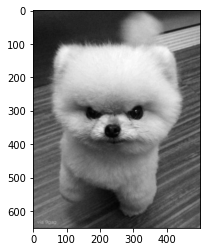

In [82]:
#blur
kernel=np.ones((3,3))/9


conv_kernel = np.flipud(np.fliplr(kernel)) #상하좌우 반전

for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x]=( conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum() 

plt.imshow(output, cmap='gray') 

#### Gaussian Blur
-  중심에 있는 픽셀에 높은 가중치를 부여
- $\sigma$ 값에 따라서 필터링 정도 결정

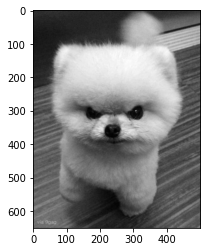

In [78]:
#Gaussian Blur - 값이 어느정도 작아야 적용이 잘 안됨
kernel=np.array([[1,2,1],[2,4,2],[1,2,1]])/16

conv_kernel = np.flipud(np.fliplr(kernel)) #상하좌우 반전

for x in range(gray_img.shape[1]):
    for y in range(gray_img.shape[0]):
        output[y,x]=( conv_kernel*paded_img[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum() 

plt.imshow(output, cmap='gray') 

> SVM kernel method: 
    - Support Vector Machine 
        > Colah's blog Neural Network가 문제를 분리하기 위해서 공간을 왜곡해서 1차원으로 변화함 (manifold learning)
    - kernel method 원 데이터를 바꾸어 하이퍼 표면을 통해서 선형 분류
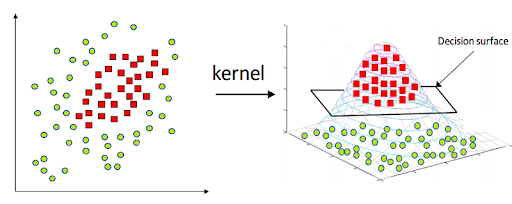

참고: https://en.wikipedia.org/wiki/Convolution 

In [163]:
import tensorflow as tf

In [ ]:
tf.keras.layers.Conv2D #functional paradigm얘사 

- 랜덤 초기화해서 생성 학습을 통해서 loss최소화 하는 값으로 변경
- 각 이미지 특성을 추출, 가장 분류 잘하는 커널값을 찾음-> 

In [168]:
#example convolution layer
input_shape=(2,6,6,3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])
y(x)

<tf.Tensor: shape=(2, 4, 4, 2), dtype=float32, numpy=
array([[[[0.6066112 , 0.        ],
         [0.09398036, 0.63523895],
         [0.        , 0.        ],
         [1.4597458 , 0.07196303]],

        [[0.        , 0.545561  ],
         [1.2116278 , 2.3019426 ],
         [1.1269406 , 0.83948123],
         [0.6075906 , 0.        ]],

        [[0.        , 0.46755916],
         [0.9873766 , 2.2613776 ],
         [1.2075554 , 0.60806847],
         [0.        , 0.        ]],

        [[0.        , 0.        ],
         [1.8260628 , 0.        ],
         [0.51008713, 0.27483928],
         [0.        , 0.        ]]],


       [[[0.        , 0.36356986],
         [0.        , 0.        ],
         [0.09348861, 0.337445  ],
         [1.6983193 , 1.8553007 ]],

        [[0.        , 2.1518753 ],
         [0.4757398 , 0.32173234],
         [2.3832319 , 0.        ],
         [1.3165491 , 0.        ]],

        [[1.0606593 , 1.7380178 ],
         [0.        , 1.2539364 ],
         [0.5506651 , 

In [169]:
y.kernel #job initializer 사용

<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 3, 2) dtype=float32, numpy=
array([[[[-0.0719009 ,  0.25796896],
         [ 0.06274587, -0.2891842 ],
         [ 0.29465598,  0.26930457]],

        [[ 0.06992301, -0.21722603],
         [-0.22422463, -0.33510625],
         [-0.26492274,  0.27879   ]],

        [[ 0.32528716, -0.2552049 ],
         [ 0.27506357, -0.25433195],
         [ 0.1049622 ,  0.26489347]]],


       [[[-0.31927255,  0.31847847],
         [ 0.301785  ,  0.00640044],
         [-0.18962894, -0.11433148]],

        [[-0.24208444, -0.01689869],
         [-0.08329558,  0.00604662],
         [ 0.144656  ,  0.04709542]],

        [[ 0.3194449 , -0.21195492],
         [ 0.11590618,  0.32251894],
         [-0.05041903, -0.17177401]]],


       [[[-0.3440097 ,  0.34548914],
         [ 0.3136037 , -0.17799823],
         [ 0.0144324 , -0.1455077 ]],

        [[ 0.01101851, -0.12063552],
         [-0.27746898, -0.1829843 ],
         [ 0.0394021 , -0.34988028]],

        [[ 0.22932

## 병렬 처리
- 내부적 GPU, `joblib` 라이브러리
- Numpy vectorizaton (for 없는 부분)

### pickle
- scikit-learn 모델 저장하여서 학습한 것을 재활용하도록 저장  
    - dump 저장
    - load 불러오기
- 확장명 마음대로 지정 가능
- 비효율적 loading오래걸림

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn=KNeighborsClassifier()
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
import pickle

In [6]:
with open('knn.pk','wb') as f:
    pickle.dump(knn,f)

In [7]:
del knn  #메모리상에 저장된거 지움

In [8]:
knn #제거됨

NameError: name 'knn' is not defined

In [9]:
with open('knn.pk','rb') as f:
    knn2= pickle.load(f)

In [10]:
vars(knn2)

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'outputs_2d_': False,
 'classes_': array([0, 1, 2]),
 '_y': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
    

In [11]:
knn2.predict([[3,2,3,3]])

array([1])

위의 dictionary를 json으로 변경하면 pickling보다 더 효율적

### joblib
-  numpy 가 cpu 효율적으로 사용하지만 현대적 관점에서는 현대적이지 못함
    - 이미  많은 라이브러리(scikit-learn, image, OpenCV 등)는 Numpy 기반으로 만들어졌음
    - 현대적인  multi-processor에 부적합
    - Numpy vectorization은 loop없이 사용하는 기법으로 loop 이용시 느리기 때문
        - tensor,pytorch vectorization 아닌 부분 decorator 로 내부적 지원 가능
- GPU,``joblib``사용하면 `async`, `await` 같은cpu 할당 기법 불필요
- Numpy 에 최적화 되어 multi-processing
   -   cpu 시간  조절해서 효율적으로 적용가능
   
- `joblib.dump( 갹체,'파일명)` 저장
    - 압축 가능 compress= gzip
- `joblib.load('파일명' )` 불러오기
  
 window기법 vectorization 사용하면 **동시 실행 가능**

In [12]:
import keyword  
len(keyword.kwlist) # cpu할당 기법(multi-processing) async, await 안 다룸 -> 대신 joblib

35

- scikit의 njobs는 joblib 인자
    - CPU 코어 사용 갯수를 지정함

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
cross_val_score  # shift+tab  -> njobs 

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

### 함수형 패러다임
- encapsulation으로 모듈화
    - cpu여러개가 똑같은거 한번에 여러번 부르게 되어 동시 사용 가능
- \_\_call__  :A()() #생성된 객체를 다시 한번 실행함
    - tensorflow  에서 많이 사용함 Functional API 
       - `lyaers.Dense(64, activation='relu)(x)`
       - node 64, 활성함수 relu 레이어에 x 넣음

In [14]:
#함수형 패러다임
import joblib

In [15]:
joblib.dump(knn2, 'kn.pk2') #모델 저장

['kn.pk2']

In [16]:
knn3= joblib.load('kn.pk2') #불러오기

In [17]:
knn3.predict([[3,2,3,3,]]) 

array([1])

In [18]:
dir(joblib) # Numpy_pickle ,parallel 동시 실행!!

['Logger',
 'MemorizedResult',
 'Memory',
 'Parallel',
 'PrintTime',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_memmapping_reducer',
 '_memory_helpers',
 '_multiprocessing_helpers',
 '_parallel_backends',
 '_store_backends',
 'backports',
 'compressor',
 'cpu_count',
 'delayed',
 'disk',
 'dump',
 'effective_n_jobs',
 'executor',
 'externals',
 'format_stack',
 'func_inspect',
 'hash',
 'hashing',
 'load',
 'logger',
 'memory',
 'my_exceptions',
 'numpy_pickle',
 'numpy_pickle_compat',
 'numpy_pickle_utils',
 'os',
 'parallel',
 'parallel_backend',
 'pool',
 'register_compressor',
 'register_parallel_backend',
 'register_store_backend',
 'wrap_non_picklable_objects']

In [19]:
from joblib import Parallel, delayed

#### Parallel
- numpy속도 높이기 위해서 njobs 사용해서 실행 환경에 맞추어 최대 사용하도록 자동으로 바꾸어 병렬처리
- scikit 에서의 -1 technique 갖고 있는 **cpu 모두 실행**
    > Numpy에서 shape 의 -1 technique 은 자동으로 크기 맞춰줌    
    - `Prallel(njobs= )(loop  )`
         - cpu 코어 동시 사용 가능한 갯수 지정 
         - functional paradigm 때문에 인자가 바로 안들어 가는 경우가 있음

 instance의 instance <-  __call__ 정의

In [21]:
dir(Parallel(-1)) #__call__  -> callble

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_backend',
 '_backend_args',
 '_dispatch',
 '_effective_n_jobs',
 '_initialize_backend',
 '_jobs',
 '_lock',
 '_managed_backend',
 '_output',
 '_print',
 '_ready_batches',
 '_terminate_backend',
 'batch_size',
 'debug',
 'dispatch_next',
 'dispatch_one_batch',
 'format',
 'n_jobs',
 'pre_dispatch',
 'print_progress',
 'retrieve',
 'timeout',
 'verbose',
 'warn']

In [25]:
#간단 예시 task 받아서 sum
def task(i):
    sum_=0
    for i in range(i):
        sum_ +=i
    return sum_

function 은 iterable하지 않음 

In [26]:
Parallel(njobs=-1)(task) #TypeError: 'function' object is not iterable

TypeError: 'function' object is not iterable

#### delayed
- function  인자를 하나씩 받기 위해서  cpu 체크하고 연기해서 받음
- ` delayed()()`
    - 합성 함수 방식으로 넣어 기능을 바꿈
    - 함수형 패러다임에서 동시에 arg 넣어야 할때 delayed 사용하여 지연시킴 

- parallel 100, 200,300 동시 실행함
- 값이 커질수록 동시에 할수 있는 만큼 CPU 병렬처리를 빠르게 속도 처리함 

In [115]:
%timeit Parallel(-1)(delayed(task)(i) for i in [100,200,300])

4.78 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [116]:
%%timeit
for i in [100,200,300]:
    task(i)

39 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [114]:
%timeit Parallel(-1)(delayed(task)(i) for i in [10000,20000,30000])

8.43 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [113]:
%%timeit
for i in [10000,20000,30000]:
    task(i)

4.75 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### denoise_tv_chambolle
- 이미지 nosie제거

In [117]:
from skimage.util import view_as_blocks,view_as_windows #computer vision용어

In [118]:
from skimage.data import hubble_deep_field # 연습용 데이터

In [119]:
from skimage.restoration import denoise_tv_chambolle

In [120]:
data= hubble_deep_field()

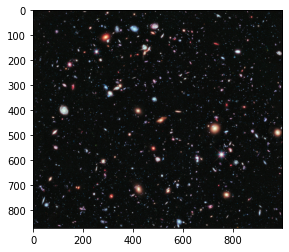

In [121]:
import matplotlib.pyplot as plt
plt.imshow(data)

In [122]:
data.shape

(872, 1000, 3)

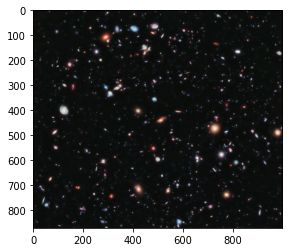

In [123]:
data2= denoise_tv_chambolle(data, weight=0.1, multichannel=True) #속도 오래걸림
plt.imshow(data2)

In [124]:
def task(i):
    return denoise_tv_chambolle(i, weight=0.1, multichannel=True)

In [125]:
@delayed   
def task(i):
    # 데코레이터
    return denoise_tv_chambolle(i, weight=0.1, multichannel=True)

In [126]:
pics= view_as_windows(data,(10,data.shape[1],data.shape[2]),step=10) #하나씩 적용시킴

In [127]:
Parallel(-1)(delayed(task)(i) for i in pics) #동시 적용- 복잡한 연산 CPU 최대 갯수로 다 계산

[(<function __main__.task(i)>,
  (array([[[[[15,  7,  4],
             [15,  9,  9],
             [ 9,  4,  8],
             ...,
             [18, 11,  5],
             [16, 19, 10],
             [15, 10,  6]],
   
            [[ 2,  7,  0],
             [ 5, 11,  7],
             [13, 19, 17],
             ...,
             [11, 10,  5],
             [13, 18, 11],
             [ 9, 11,  6]],
   
            [[10, 15,  9],
             [13, 18, 14],
             [18, 22, 23],
             ...,
             [ 1,  2,  0],
             [14, 15, 10],
             [ 8, 14, 10]],
   
            ...,
   
            [[ 4, 18,  3],
             [12, 22, 13],
             [13, 18, 14],
             ...,
             [29, 21, 18],
             [ 9, 12,  3],
             [14,  9,  5]],
   
            [[ 4, 13, 10],
             [ 8, 17, 14],
             [13, 19, 15],
             ...,
             [13, 14,  8],
             [16, 13,  6],
             [ 6, 12,  0]],
   
            [[11, 16, 1

- 각각의 view_as_window는 각 각 독립이기 때문에 cpu 여러개면 더 빠르게함
- vectorization이 아닌 parallelization 기법임
- CPU,GPU 갯수 많으면 joblib이용 빠르게 처리 +Numpy 더 빠름

In [46]:
def vizualize_image(img,ax):
    ax.imshow(img,cmap='gray')

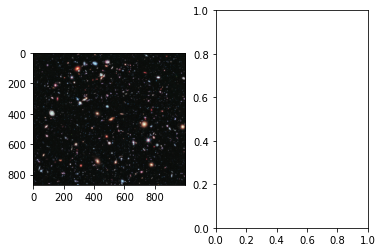

In [47]:
fig,ax=plt.subplots(1,2)
vizualize_image(data,ax[0])

---
## 흑백 이미지의  값 보여주기
- 흑백이미지에 각 픽셀마다 해당 값 표현

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [130]:
(X_train, y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

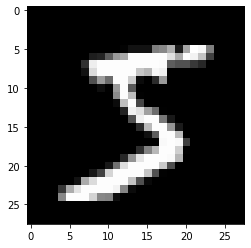

In [131]:
plt.imshow(X_train[0],cmap='gray')

In [45]:
X_train[0].shape, X_train[0].max()

((28, 28), 255)

> 2차원 width, height 전체 탐색 하기위해 for 중첩함
> 예 . 구구단 만들기

In [ ]:
for i in range(2,10):
    for j in range(2,10):
        print (i,'x',j,'=',i*j)

In [38]:
# 흑백 이미지 값 보여주기- shape(width, height)
def vizualize_gray_image(img,ax):
    ax.imshow(img,cmap='gray') #흑배 이미지
    width, height =img.shape   #이미지 모양 
    thresh =img.max()/2.5      #font 색상 지정하지 위한 기준 예.255/2.5=102
    for x in range(width):  
        for y in range(height):       #(높이,넓이 )
             #그래프에 문자 넣기 
            ax.annotate(str(round(img[x][y],2)),xy=(y,x), 
             #수직,수평 중앙 정렬   
                            horizontalalignment ='center', verticalalignment='center',
                       #글자 색상 잘 보이기 위해  threshold(기준) 따라서 지정
                        color='white' if img[x][y] < thresh else'black'  )

- Input :Numpy (height, width)
- Output: PIL  ( width, height)

색상 이미지는 3차원이므로 2차원에 값 표현 하기 어려움

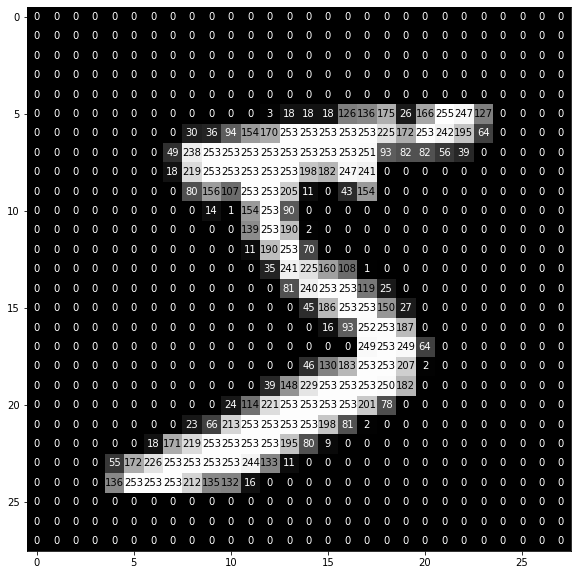

In [128]:
fig,ax=plt.subplots(1,1, figsize=(10,10))
vizualize_gray_image(X_train[0],ax)

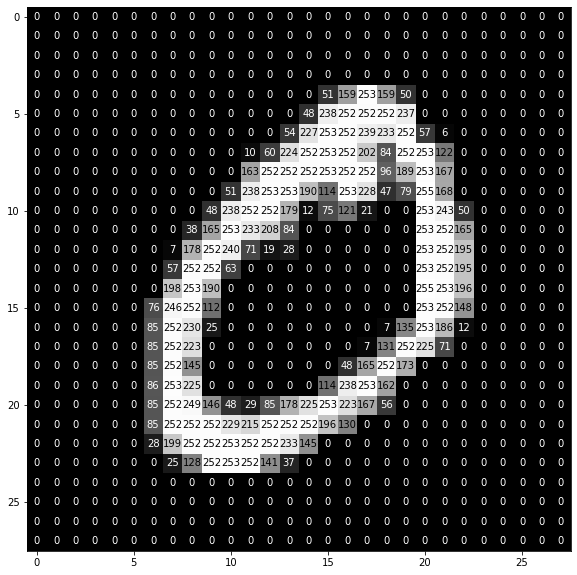

In [80]:
plt.figure(figsize=(10,10))
vizualize_gray_image(X_train[1],plt) #for 속도느림

#### matplotlib
- pylab
    - matlab과 거의 동일한 방식으로 namespace 충돌, 메모리 문제로 더이상 사용하지 않음
- pyplot
    - standard 표준 vs de facto 사실상 표준 
        - standard: 위에서 정한 표준
        - de facto: 표준으로 정하지 않았지만 대중들이 많이 사용하게 되면서 표준이됨
       >  Web standard vs Recommendation
    -  객체를 구분해 놓음
#### State Machine
- 가까이 있는 cell의 값을 바꿔줌
- 하위 객체를 만들면 상위 객체를 지정하지 않으면 상위객체를 자동적으로 만들어줌
    - 예. figure > axes ...
- 가독성이 떨어짐

In [81]:
import matplotlib.pyplot as plt

In [83]:
plt.figure() #기본 inch당 픽셀로 만들어놓음

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

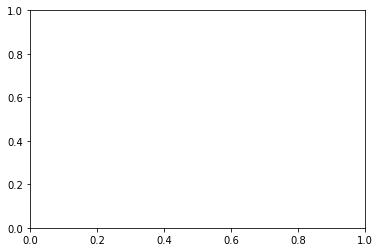

In [84]:
plt.figure()
plt.axes() #실제 그래프를 그림

<AxesSubplot:>

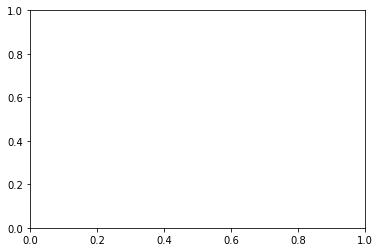

In [85]:
plt.axes()  #figure 없이도 나옴

Text(0.5, 1.0, 'Line graph')

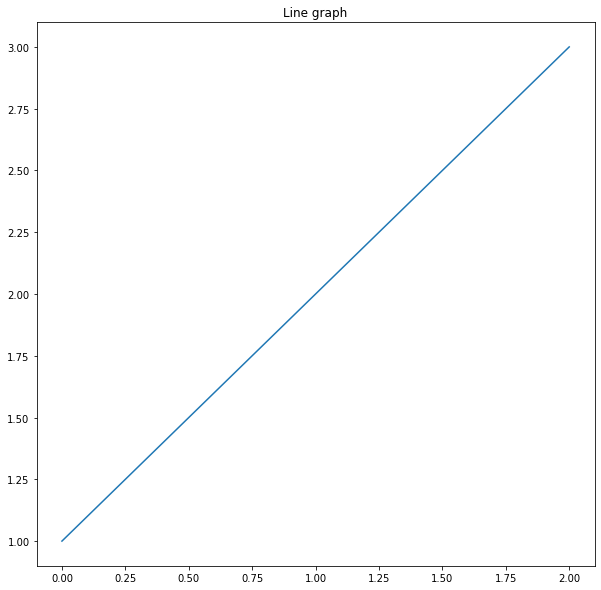

In [92]:
plt.figure(figsize=(10,10))
plt.axes()
plt.plot([1,2,3]) #그래프 실제 들어간느 값
plt.title('Line graph')

Text(0.5, 1.0, 'bbb')

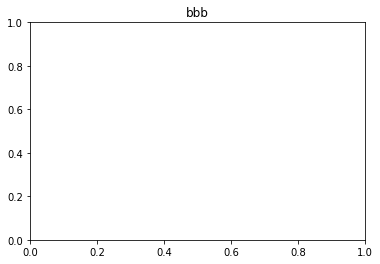

In [94]:
plt.title('bbb') #상위 객체 figure, axes를 가져옴

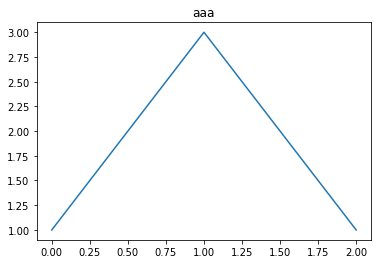

In [98]:
#python은 fucntional paradigm-> subplot 이용해서 객체 
fig,ax=plt.subplots(1,1)
ax.set_title('aaa')
ax.plot([1,3,1])

([<matplotlib.axis.XTick at 0x7fe0bcda6650>], [Text(0, 0, '')])

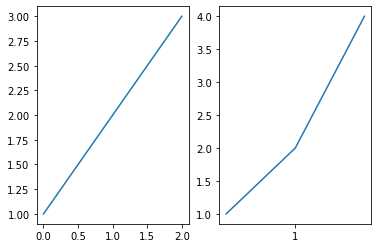

In [104]:
plt.subplot(1,2,1) #figure, axes 없어서 생성함
plt.plot([1,2,3])  #가장 가까운 subplot에 그림

plt.subplot(1,2,2) 
plt.plot([1,2,4]) 
plt.xticks([1])    #오른쪽 그래프만 변경

plt.title_

<PolarAxesSubplot:>

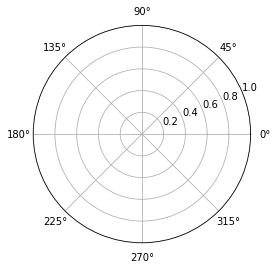

In [108]:
plt.axes(polar=True)

#### axes
- graph 를 의미
그림 배치도 마음대로 할 수 있음
겹처 그리기도 가능

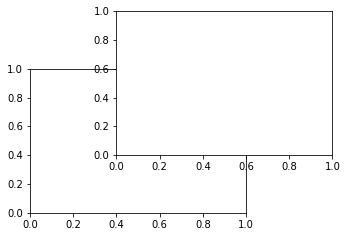

In [110]:
plt.axes((0,0,0.5,0.5)) #비율로 그림  동시에 여러개 그림
plt.axes((0.2,0.2,0.5,0.5))

/Users/MG/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<AxesSubplot:>

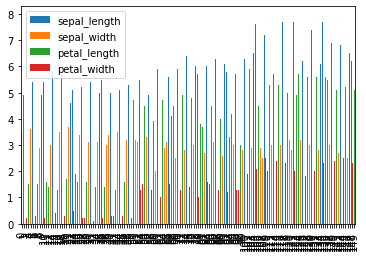

In [111]:
import pandas as pd # matplotlib 기반 ->ax인자로 plt. subplot집어 넣기 가능
import seaborn as sns
iris=sns.load_dataset('iris')
iris.plot.bar() #bar ax인자 -> 동시에 여러개 그림 